In [1]:
import pymolzilla.processing as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

In [10]:
f = pm.ferh_fm_zeynab()
f.load()
f.preprocess()
for i,ff in enumerate(f):
    print('custom processing set:',i)
    ff.collect_merge()
    ff.symmetrize_beta()

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
loading set: 9
loading set: 10
loading set: 11
loading set: 12
loading set: 13
loading set: 14
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
preprocessing set: 9
preprocessing set: 10
preprocessing set: 11
preprocessing set: 12
preprocessing set: 13
preprocessing set: 14
custom processing set: 0
custom processing set: 1
custom processing set: 2
custom processing set: 3
custom processing set: 4
custom processing set: 5
custom processing set: 6
custom processing set: 7
custom processing set: 8
custom processing set: 9
custom processing set: 10
custom processing set: 11
custom processing set: 12
custom processing set: 13
custom processing set: 14


In [11]:
f.df

,set,obj,wavelength,flags,sample_rotation,hext
0,0460_L,<pymolzilla.processing.file_import.SetRotmld o...,460,L,0,50
1,0530_L,<pymolzilla.processing.file_import.SetRotmld o...,530,L,0,50
2,0620_L,<pymolzilla.processing.file_import.SetRotmld o...,620,L,0,50
3,0710_H,<pymolzilla.processing.file_import.SetRotmld o...,710,H,0,207
4,0710_L,<pymolzilla.processing.file_import.SetRotmld o...,710,L,0,50
5,0810_L,<pymolzilla.processing.file_import.SetRotmld o...,810,L,0,50
6,0920_L,<pymolzilla.processing.file_import.SetRotmld o...,920,L,0,50
7,1050_H,<pymolzilla.processing.file_import.SetRotmld o...,1050,H,0,207
8,1050_L,<pymolzilla.processing.file_import.SetRotmld o...,1050,L,0,50
9,1200_L,<pymolzilla.processing.file_import.SetRotmld o...,1200,L,0,50


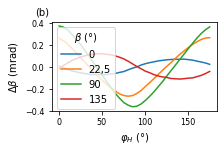

In [15]:
fig, ax = plt.subplots(figsize=(3,2), constrained_layout=True)
g = f[13].data
phih = g['phih']

ax.plot(phih, g[0.], color='C0', label='0')
ax.plot(phih, g[22.5], color='C1', label='22,5')
ax.plot(phih, g[45.], color='C2', label='90')
ax.plot(phih, g[90.], color='C3', label='135')

ax.legend(title=r'$\beta$ ($\degree$)')
ax.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax.set_ylabel(r'$\Delta\beta$ (mrad)')
ax.text(-0.1, 1.08, "(b)", transform=ax.transAxes)

fig.savefig('out/ferh-data.pdf')